In [ ]:
# Jai Bajrangbali

In [ ]:
# Utility function to save preprocessor and model.pkl files
!pip install dill --quiet
import dill
def save_object(file_path:str, obj):
  with open(file_path, "wb") as file_obj:
    dill.dump(obj, file_obj)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.5 MB/s eta 0:00:00


# Telco Customer Churn Prediction

In [ ]:
pip install -U sklearn_evaluation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.6 MB/s eta 0:00:00


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.4 MB/s eta 0:00:00


## Configuration and Setup

In [ ]:
# Importing libs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
    GradientBoostingClassifier,
    AdaBoostClassifier,
    StackingClassifier,
    VotingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    classification_report,
    confusion_matrix,
    f1_score,
    ConfusionMatrixDisplay
)
from sklearn_evaluation import plot
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Get the data

In [ ]:
data_path = "../artifacts/data"
files = os.listdir(data_path)
files
for file in files:
    file_name = os.path.splitext(file)[0]
    globals()[f'{file_name}_df'] = pd.read_excel(os.path.join(data_path, file))

df_s = [

    Telco_customer_churn_df,

    Telco_customer_churn_demographics_df,

    Telco_customer_churn_location_df,

    Telco_customer_churn_population_df,

    Telco_customer_churn_services_df,

    Telco_customer_churn_services_df,

    CustomerChurn_df
]

## Data Analysis and EDA/Visualization

In [ ]:
Telco_customer_churn_df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
Telco_customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
Telco_customer_churn_df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
# Investigating all categorical values in the dataset
categorical_data = []
for column in Telco_customer_churn_df:
    value_counts = pd.value_counts(Telco_customer_churn_df[column])
    value_counts_len = len(value_counts.index.to_list())

    if value_counts_len < 10 and value_counts_len!=1:
        categorical_data.append(column)
        print(f"Unique values for column '{column}' : {value_counts.index.to_list()} having len {value_counts_len}")

Unique values for column 'Gender' : ['Male', 'Female'] having len 2
Unique values for column 'Senior Citizen' : ['No', 'Yes'] having len 2
Unique values for column 'Partner' : ['No', 'Yes'] having len 2
Unique values for column 'Dependents' : ['No', 'Yes'] having len 2
Unique values for column 'Phone Service' : ['Yes', 'No'] having len 2
Unique values for column 'Multiple Lines' : ['No', 'Yes', 'No phone service'] having len 3
Unique values for column 'Internet Service' : ['Fiber optic', 'DSL', 'No'] having len 3
Unique values for column 'Online Security' : ['No', 'Yes', 'No internet service'] having len 3
Unique values for column 'Online Backup' : ['No', 'Yes', 'No internet service'] having len 3
Unique values for column 'Device Protection' : ['No', 'Yes', 'No internet service'] having len 3
Unique values for column 'Tech Support' : ['No', 'Yes', 'No internet service'] having len 3
Unique values for column 'Streaming TV' : ['No', 'Yes', 'No internet service'] having len 3
Unique value

In [ ]:
# The 5 df's (subset of telco_churn) demographics/location etc. are to be dealt with.
categorical_data

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn Label',
 'Churn Value']

#### Categorical Data

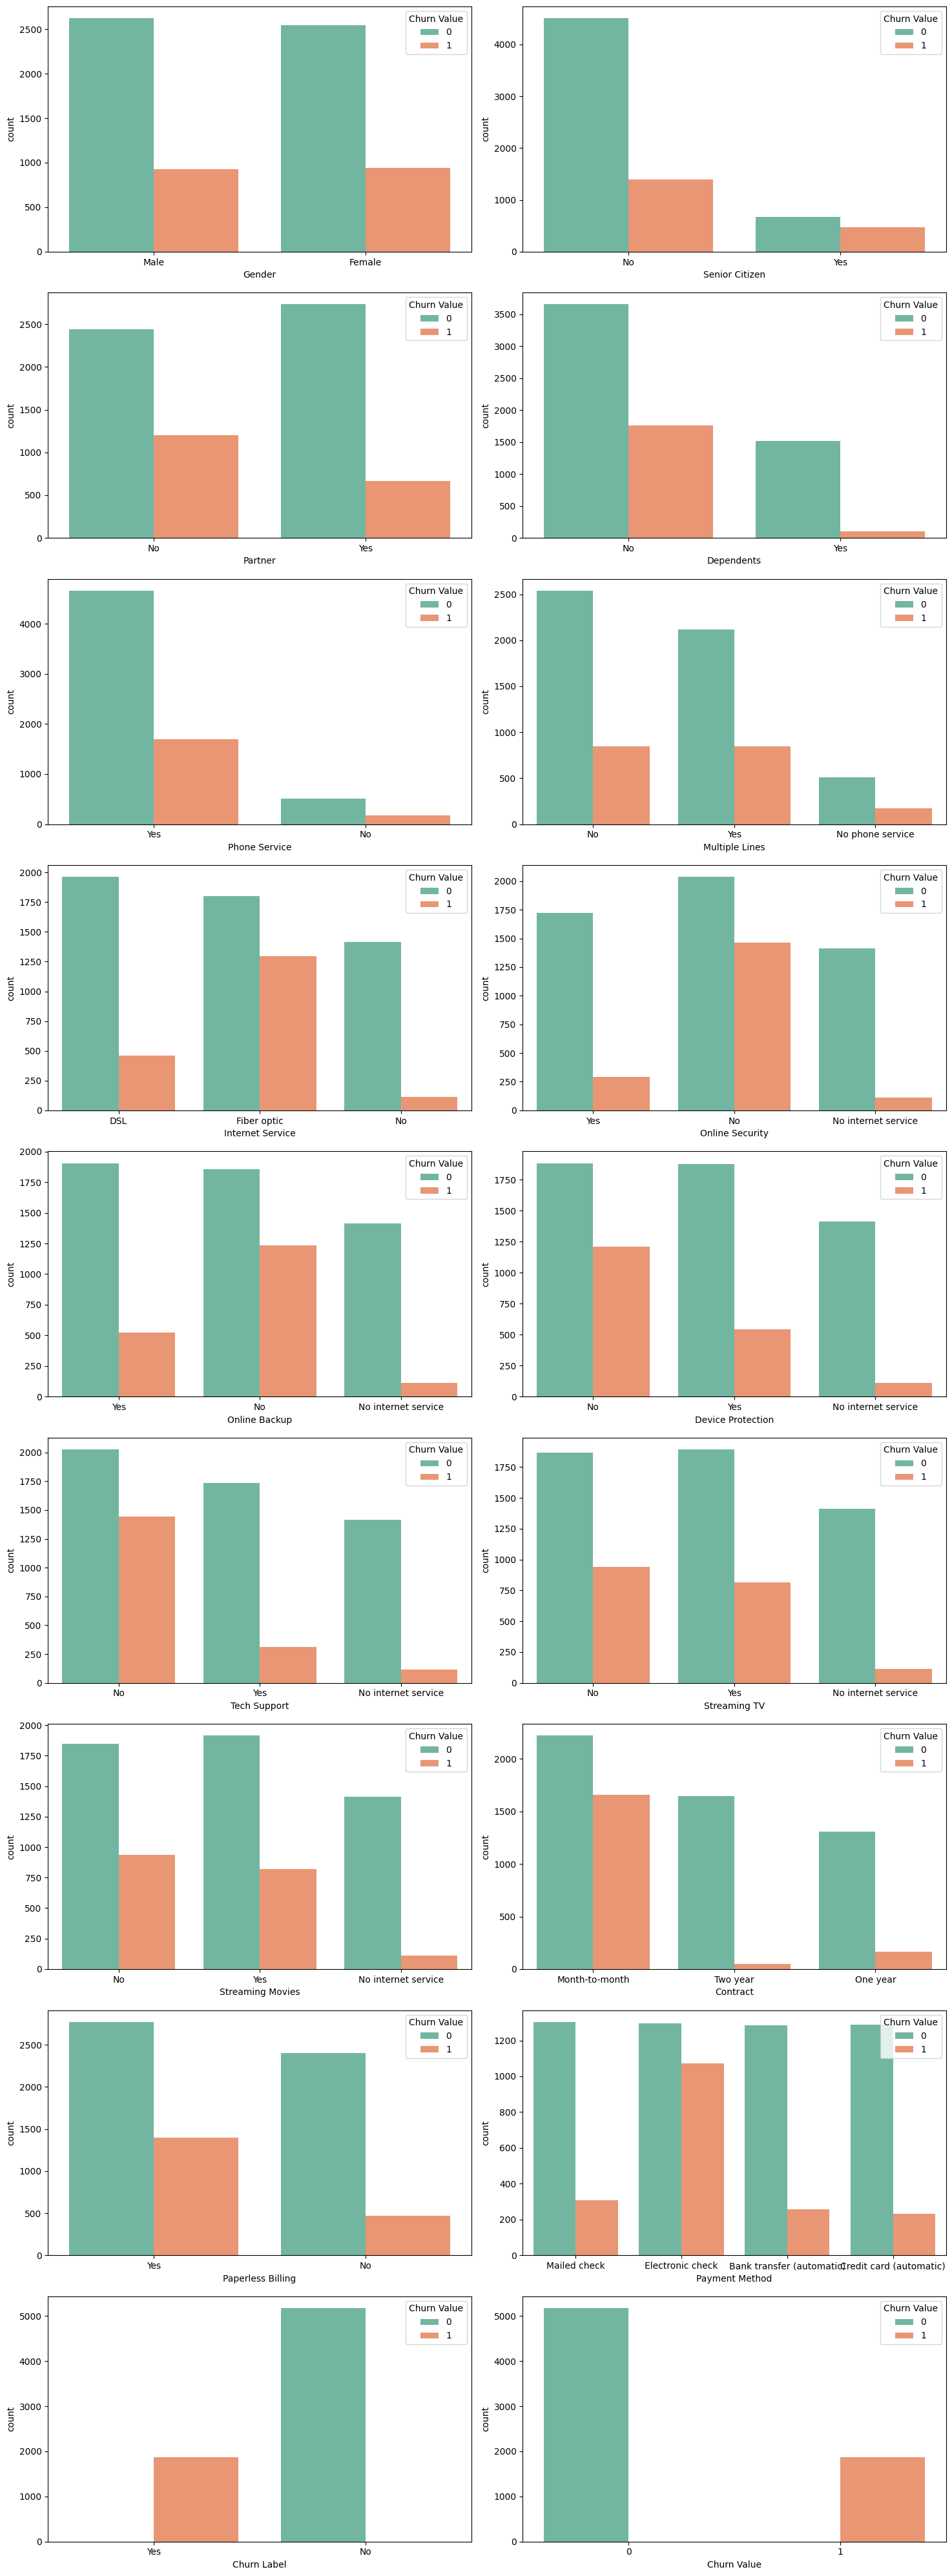

In [ ]:
# Custom plot
fig, axes = plt.subplots(9,2, figsize=(15,40))
axes = axes.flatten()
for i in range(len(categorical_data)):
    features = categorical_data[i]
    sns.countplot(x=features, data=Telco_customer_churn_df, palette = 'Set2', ax=axes[i], hue='Churn Value')

plt.tight_layout()
plt.show()

#### Continous Data

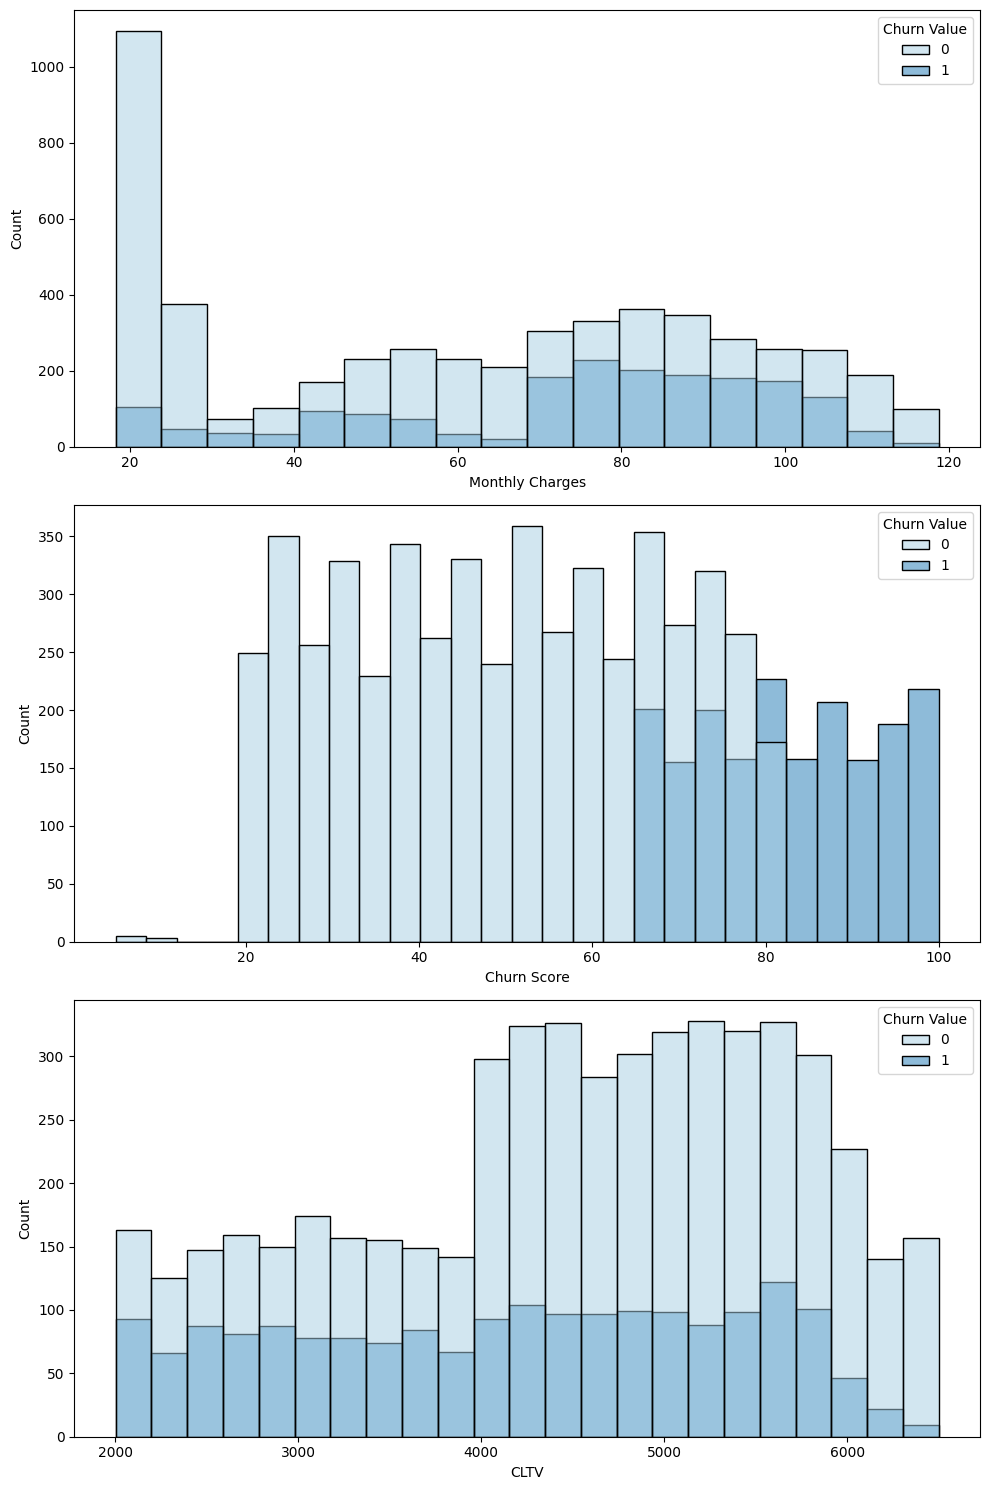

In [ ]:
continous_data = ['Monthly Charges', 'Churn Score', 'CLTV']
fig, axes = plt.subplots(3,1, figsize=(10,15))
axes = axes.flatten()
for i in range(len(continous_data)):
    features = continous_data[i]
    sns.histplot(x=features, data=Telco_customer_churn_df, ax=axes[i], palette='Paired', hue='Churn Value')
plt.tight_layout()
plt.show()

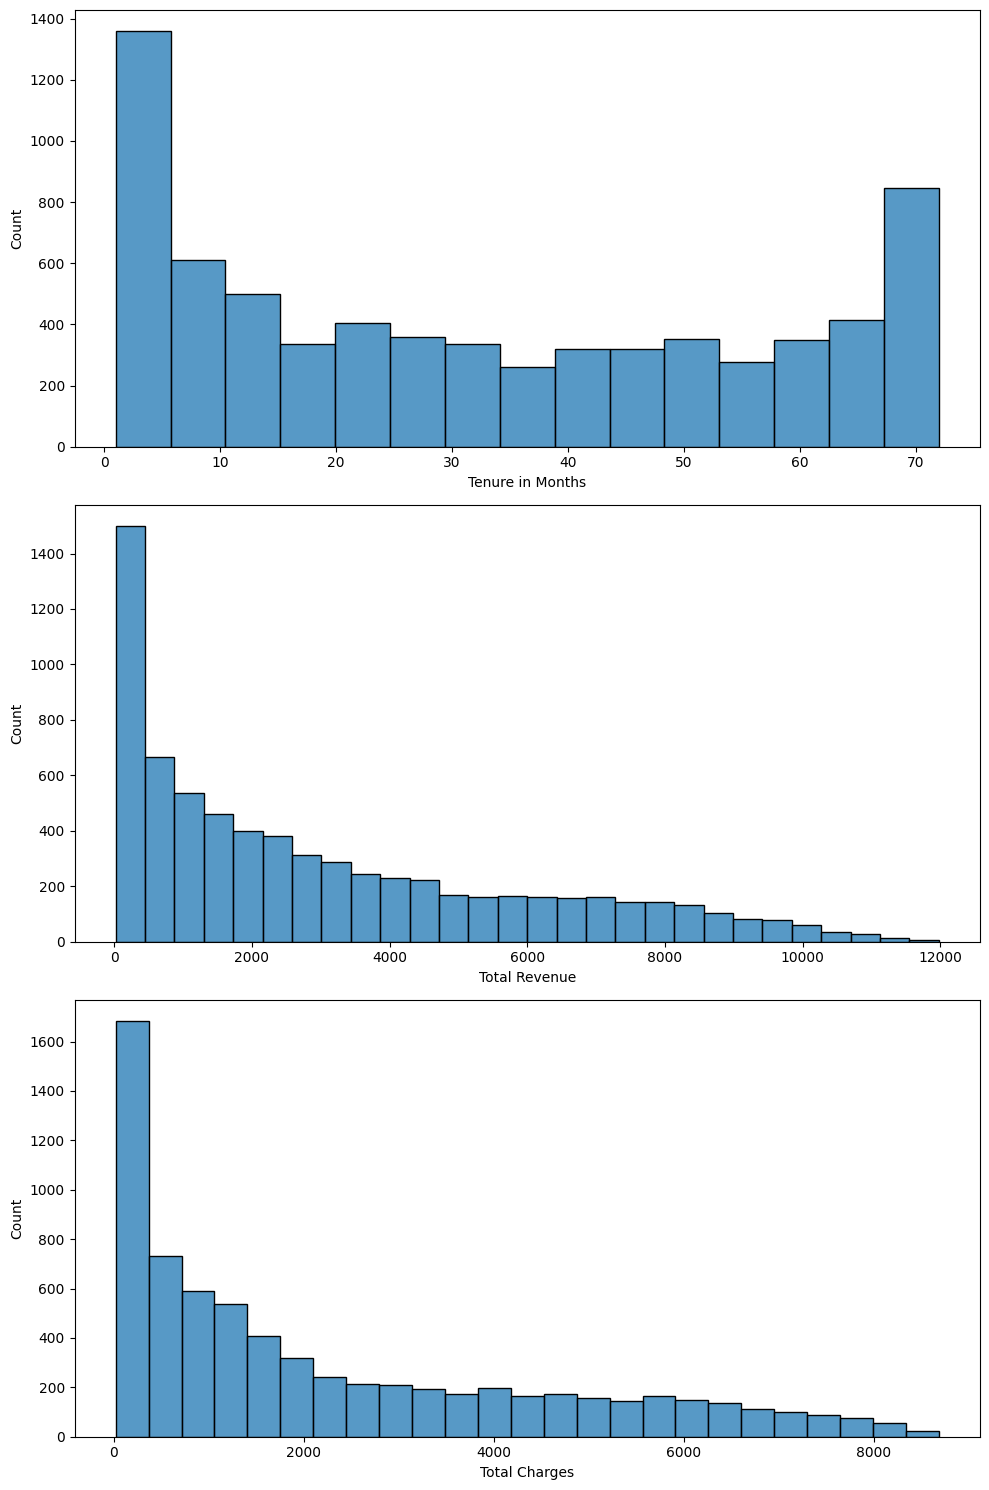

In [ ]:
continous_data = ['Tenure in Months', 'Total Revenue', 'Total Charges']
fig, axes = plt.subplots(3,1, figsize=(10,15))
axes = axes.flatten()
for i in range(len(continous_data)):
    features = continous_data[i]
    sns.histplot(x=features, data=Telco_customer_churn_services_df, ax=axes[i])
plt.tight_layout()
plt.show()

#### Number of Dependents

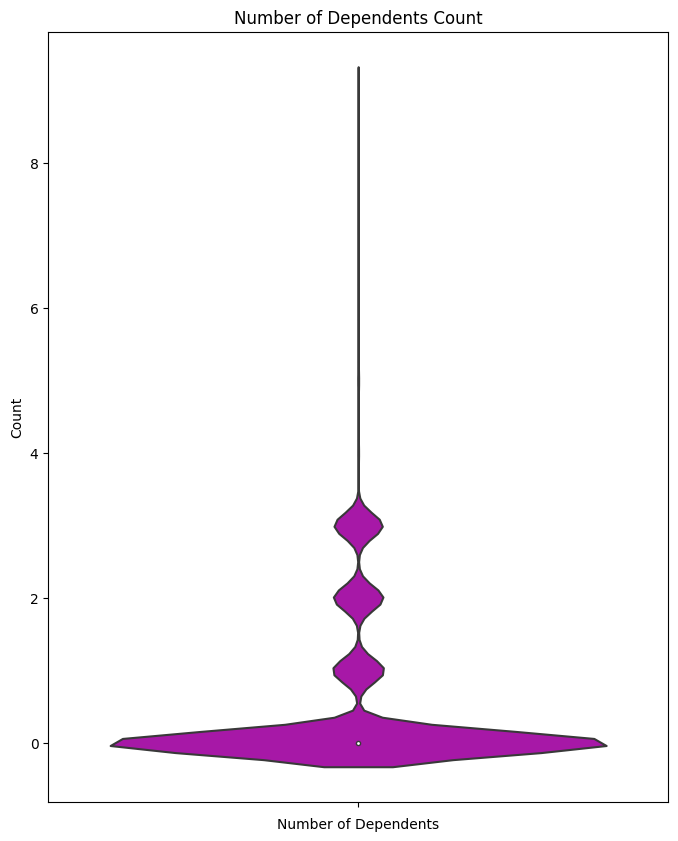

In [ ]:
plt.figure(figsize=(8,10))
sns.violinplot(Telco_customer_churn_demographics_df, y='Number of Dependents', color='m')
plt.xlabel("Number of Dependents")
plt.ylabel("Count")
plt.title("Number of Dependents Count")
plt.show()

In [ ]:
# Distribution of People around the city.
fig = px.scatter_mapbox(
    Telco_customer_churn_df,
    lat = 'Latitude',
    lon = 'Longitude',
    color = 'Churn Score',
    hover_name = 'Churn Value',
    # size = 'Churn Value',
    zoom = 5,
    height = 800,
    width = 800
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

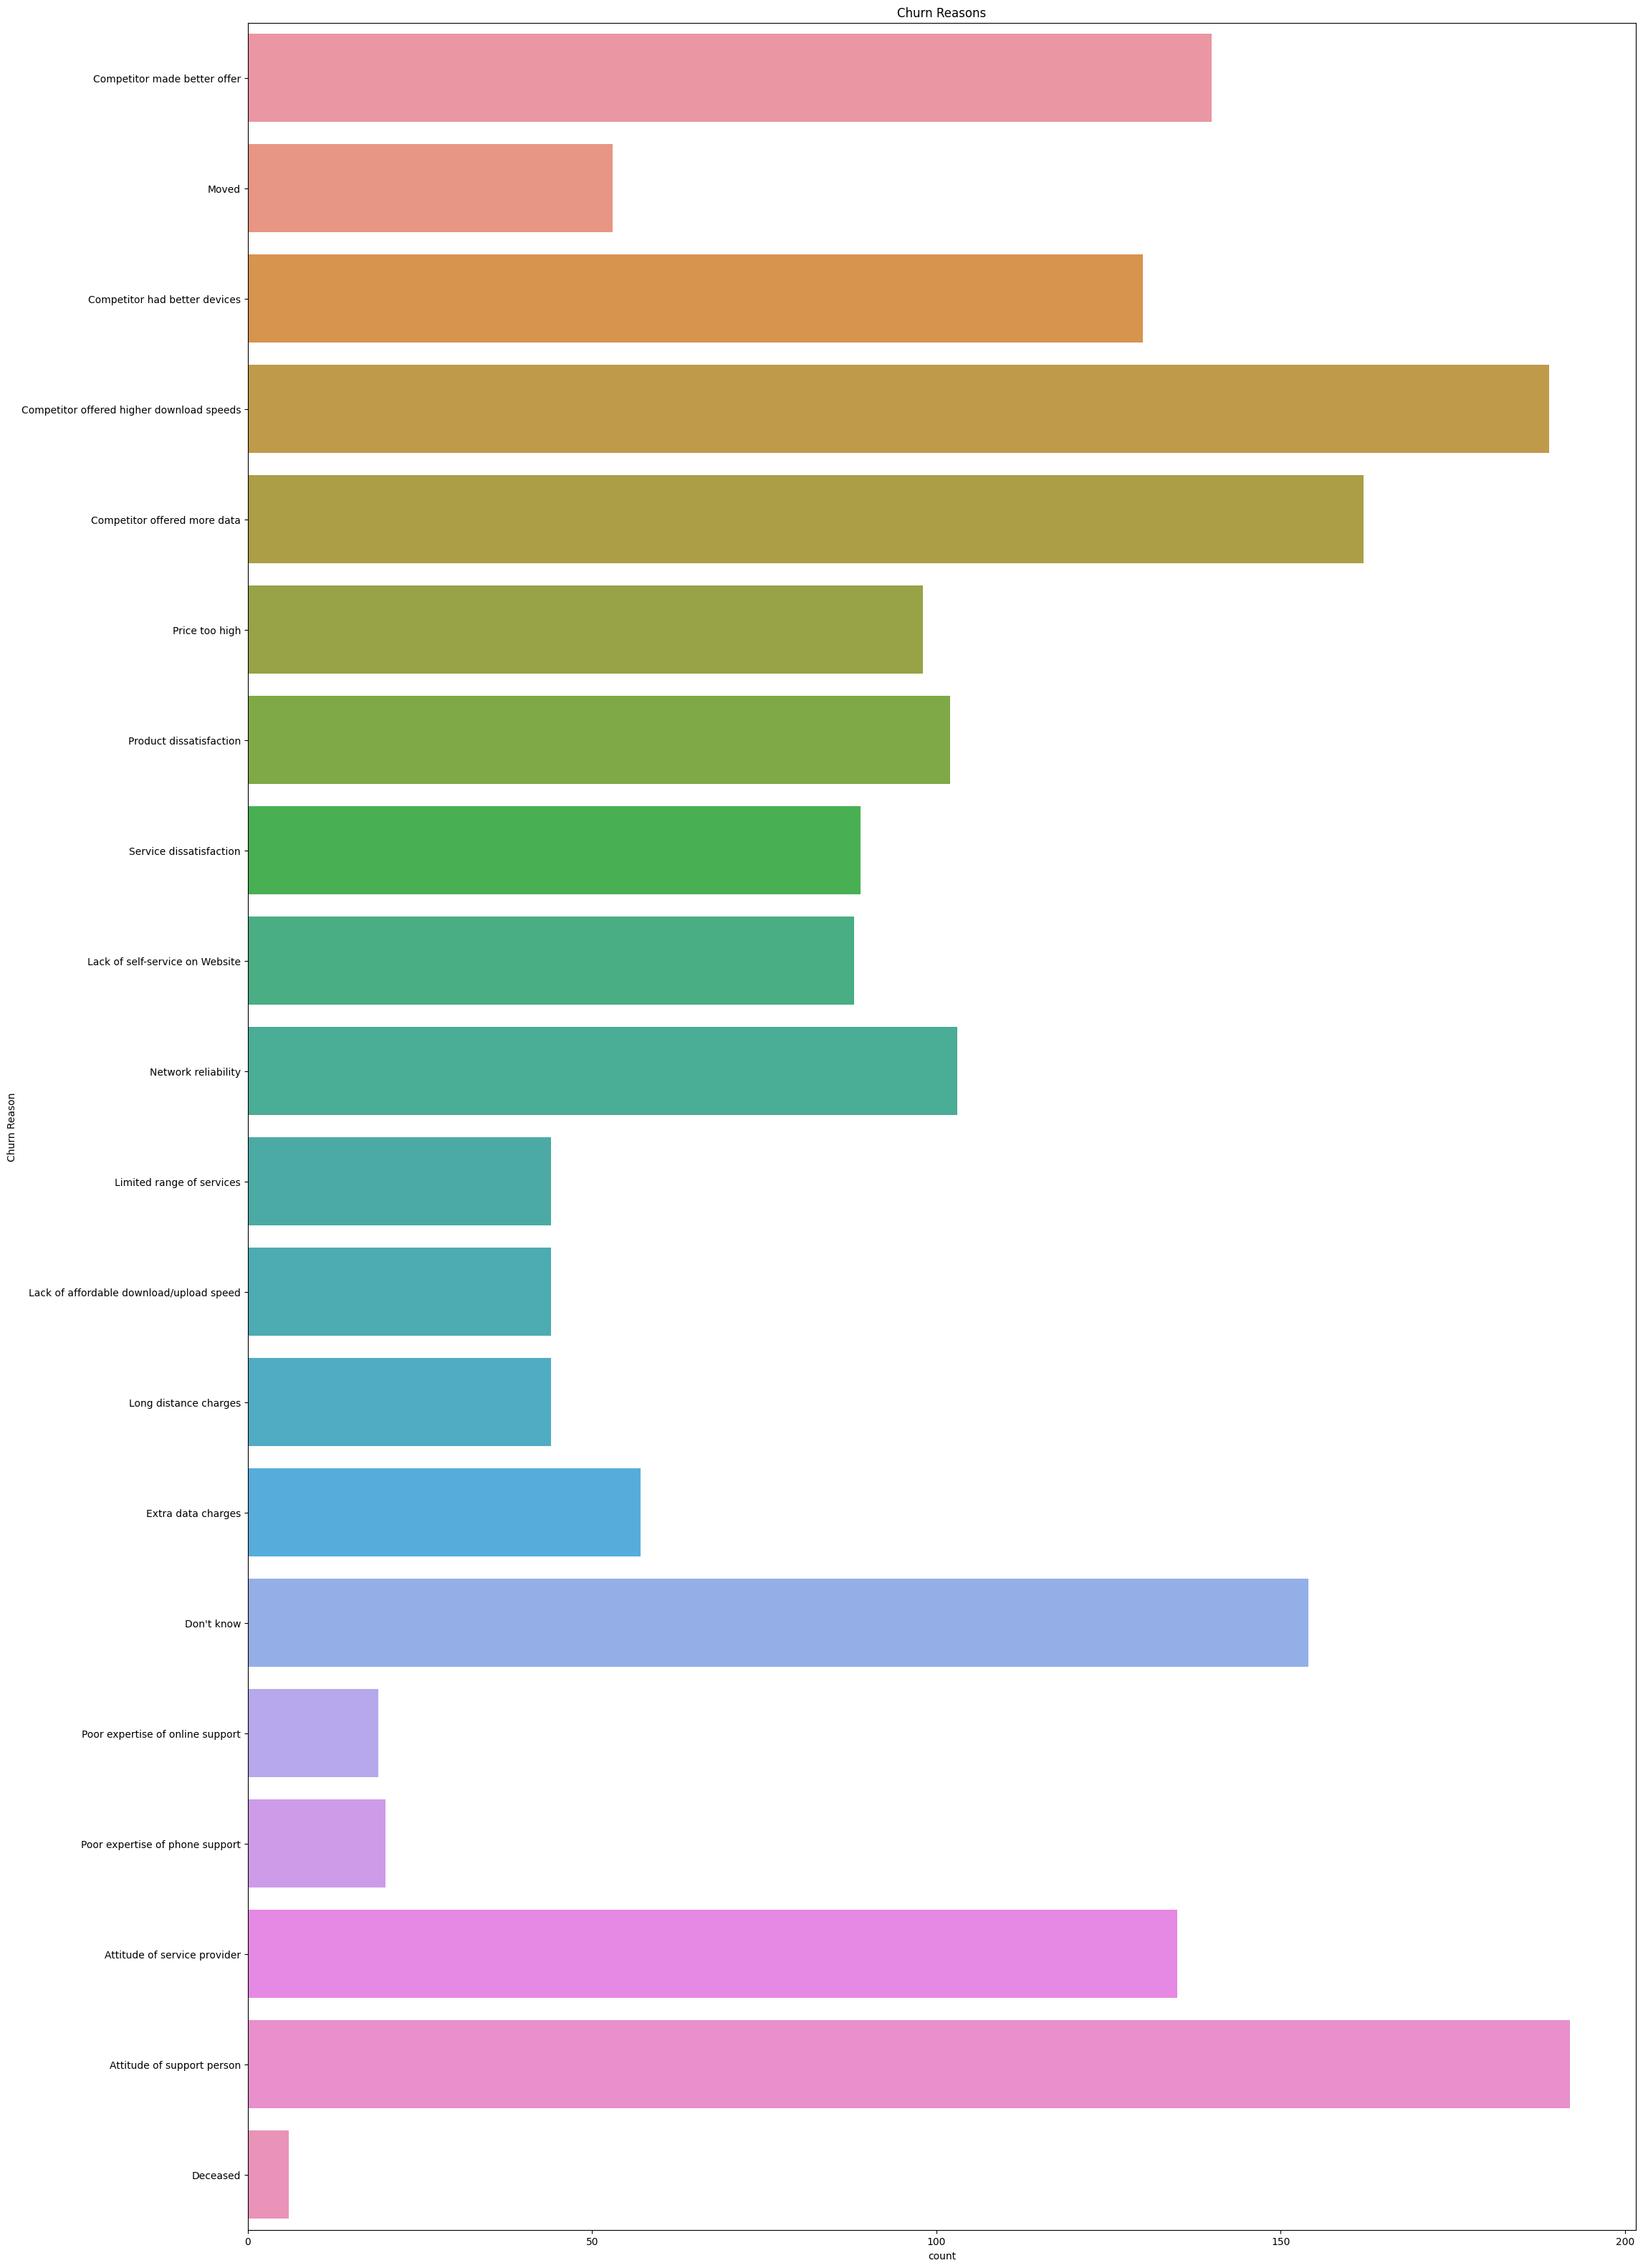

In [ ]:
# Reason for churn -> most imp to analyze
plt.figure(figsize=(25,40))
sns.countplot(y='Churn Reason', data=Telco_customer_churn_df)
# plt.legend()
plt.title("Churn Reasons")
sns.set(font_scale=5)
# plt.tight_layout()
plt.show()

## Feature Engineering

In [ ]:
df = Telco_customer_churn_df.copy()

In [ ]:
dummy_cat_features = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
    'Internet Service','Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
    'Streaming TV', 'Streaming Movies', 'Contract','Paperless Billing', 'Payment Method'
]
drop_features = [
    'CustomerID', 'Lat Long', 'Churn Reason', 'Country', 'State',
    'City', 'Zip Code', 'Churn Label', 'Count', 'Churn Score'
]


transformation_pipeline = Pipeline(
    steps=[
        ("one hot encoder", OneHotEncoder())
    ]
)

preprocessor = ColumnTransformer([
    ("transformation_pipeline", transformation_pipeline, dummy_cat_features)
], remainder='passthrough')

data_new = df.drop(drop_features, axis=1)
data_new['Total Charges'] = pd.to_numeric(data_new['Total Charges'], errors='coerce')
data_new.dropna(axis=0, inplace=True)

X = data_new.drop(['Churn Value'], axis=1).copy()
Y = data_new['Churn Value']

X_train_, X_test_, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = preprocessor.fit_transform(X_train_)
X_test = preprocessor.transform(X_test_)
save_object("preprocessor_telco.pkl", preprocessor)

### Correlation Heatmap{Matrix}

In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           7032 non-null   float64
 1   Longitude          7032 non-null   float64
 2   Gender             7032 non-null   object 
 3   Senior Citizen     7032 non-null   object 
 4   Partner            7032 non-null   object 
 5   Dependents         7032 non-null   object 
 6   Tenure Months      7032 non-null   int64  
 7   Phone Service      7032 non-null   object 
 8   Multiple Lines     7032 non-null   object 
 9   Internet Service   7032 non-null   object 
 10  Online Security    7032 non-null   object 
 11  Online Backup      7032 non-null   object 
 12  Device Protection  7032 non-null   object 
 13  Tech Support       7032 non-null   object 
 14  Streaming TV       7032 non-null   object 
 15  Streaming Movies   7032 non-null   object 
 16  Contract           7032 

In [ ]:
corr_matrix = data_new.corr()
corr_matrix["Churn Value"].sort_values(ascending=False).to_frame()

<ipython-input-23-62dd5b3b9e2e>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Churn Value
Churn Value,1.000000
Monthly Charges,0.192858
Longitude,0.004693
Latitude,-0.003600
CLTV,-0.128253
Total Charges,-0.199484
Tenure Months,-0.354049


<Axes: >

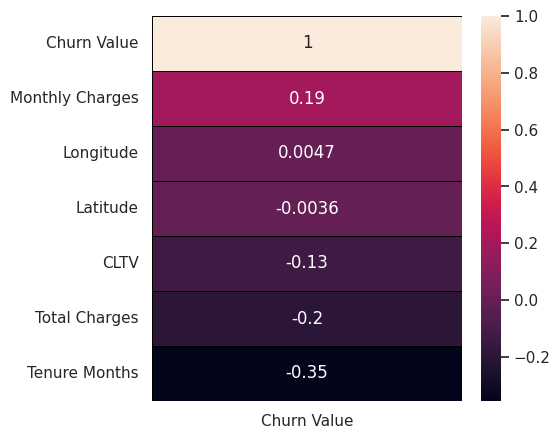

In [ ]:
plt.figure(figsize = (5,5))
sns.set(font_scale=1)
sns.heatmap(corr_matrix["Churn Value"].sort_values(ascending=False).to_frame(), annot = True,linewidths = 0.4,linecolor = 'black')

### Data Preparation

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(5625, 49) (5625,)
(1407, 49) (1407,)


## Model Training

### Model Preparation

In [ ]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Gaussian Naive Bayes' : GaussianNB(),
    'K Nearest Neighbors' : KNeighborsClassifier(),
    'Support Vector Machine' : SVC(probability=True),
    'Decision Tree Classifier' : DecisionTreeClassifier(),
    'Random Forest Classifier' : RandomForestClassifier(),
    'Bagging Classifier' : BaggingClassifier(
        base_estimator=RandomForestClassifier(),
        n_estimators=10
    ),
    'Gradient Boosting Classifier' : GradientBoostingClassifier(),
    'AdaBoost' : AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(),
        n_estimators=50
    ),
    'Stacking Classifier' : StackingClassifier(
        estimators=[
            ('log_reg', LogisticRegression()),
            ('random_forest', RandomForestClassifier()),
            ('grad_boost', GradientBoostingClassifier())
        ]
    ),
    'Voting Classifier' : VotingClassifier(
        estimators=[
            ('log_reg', LogisticRegression()),
            ('random_forest', RandomForestClassifier()),
            ('grad_boost', GradientBoostingClassifier())
        ]
    ),
    'XgBoost' : XGBClassifier(),
    'LightGBM' : LGBMClassifier(
        scale_pos_weight =3,
        random_state=42,
        objective = 'binary'
    ),
    'Catboost' : CatBoostClassifier()
    }
model_accs = []
model_precs = []
model_recalls = []
model_f1s = []
model_names = []


# Models used for Training

In [ ]:
param_grid = {
    'Logistic Regression' : {
        'penalty' : ['l2'],
        'C' : [0.1, 1, 10],
        'max_iter' : [100, 1000, 10000]
    },
    'Gaussian Naive Bayes' : {}, # No hyperparameters to tune
    'K Nearest Neighbors' : {
        'n_neighbors' : [1, 5, 10],
        'weights' : ['uniform', 'distance']
    },
    'Support Vector Machine' : {
        'C' : [0.1, 1],
        'kernel' : ['rbf'],
        'gamma' : [0.1, 0.01]
    },
    'Decision Tree Classifier' : {
        'criterion' : ['gini', 'log_loss'],
        'max_depth' : [None, 10, 100]
    },
    'Random Forest Classifier' : {
        'criterion' : ['gini', 'log_loss'],
        'max_depth' : [None, 10, 100],
        'n_estimators' : [100, 200, 300]
    },
    'Bagging Classifier' : {
        'n_estimators' : [10, 20, 30, 100]
    },
    'Gradient Boosting Classifier' : {
        'learning_rate' : [0.1, 1],
        'n_estimators' : [100, 200, 300]
    },
    'AdaBoost' : {
        'n_estimators' : [50, 100, 200, 300]
    },
    'Stacking Classifier' : {}, # No hyperparameter to tune
    'Voting Classifier' : {}, # No hyperparameter to tune
    'XgBoost' : {},
    'LightGBM' : {
        'learning_rate' : [0.1, 0.01],
        'max_depth' : [-5, -10, -20]
    },
    'CatBoost' : {
        'depth' : [6, 8, 10],
        'learning_rate' : [0.01, 0.05, 0.1],
        'iterations' : [30, 50, 100]
    }

}

### Training and Evaluation

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
for model_name, model in models.items():
    if model_name in param_grid:
        hyper_parameters = param_grid[model_name]
        grid_search = GridSearchCV(model, hyper_parameters, cv=5)
        grid_search.fit(X_train, Y_train)
        best_model = grid_search.best_estimator_
        save_object(f"{model_name}.pkl", best_model)
        Y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred)
        precision = precision_score(Y_test, Y_pred)
        recall = recall_score(Y_test, Y_pred)
        f1 = f1_score(Y_test, Y_pred)
        print(classification_report(Y_test, Y_pred))

        # Appending the lists with scores
        model_accs.append(accuracy_score)
        model_precs.append(precision)
        model_recalls.append(recall)
        model_f1s.append(f1)
        model_names.append(model_name)

        # confusion matrix could also be considered as done in the final project...

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1012
           1       0.71      0.56      0.62       395

    accuracy                           0.81      1407
   macro avg       0.77      0.73      0.75      1407
weighted avg       0.80      0.81      0.80      1407

              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1012
           1       0.51      0.84      0.63       395

    accuracy                           0.72      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.72      0.74      1407

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      1012
           1       0.65      0.18      0.28       395

    accuracy                           0.74      1407
   macro avg       0.70      0.57      0.56      1407
weighted avg       0.72      0.74      0.68      1407

              preci

In [ ]:
# Printing performance metrics

model_dict = {
    'Model': model_names,
    'Precision': model_precs,
    'Acuuracy': model_accs,
    'Recall': model_recalls,
    'F1': model_f1s
}

models_df = pd.DataFrame(model_dict)

In [ ]:
models_df

,Model,Precision,Acuuracy,Recall,F1
0,Logistic Regression,0.706070,<function accuracy_score at 0x7fae8caf8670>,0.559494,0.624294
1,Gaussian Naive Bayes,0.506098,<function accuracy_score at 0x7fae8caf8670>,0.840506,0.631779
2,K Nearest Neighbors,0.654206,<function accuracy_score at 0x7fae8caf8670>,0.177215,0.278884
3,Support Vector Machine,0.692308,<function accuracy_score at 0x7fae8caf8670>,0.022785,0.044118
4,Decision Tree Classifier,0.579710,<function accuracy_score at 0x7fae8caf8670>,0.506329,0.540541
5,Random Forest Classifier,0.693252,<function accuracy_score at 0x7fae8caf8670>,0.572152,0.626907
6,Bagging Classifier,0.699346,<function accuracy_score at 0x7fae8caf8670>,0.541772,0.610556
7,Gradient Boosting Classifier,0.717105,<function accuracy_score at 0x7fae8caf8670>,0.551899,0.623748
8,AdaBoost,0.509950,<function accuracy_score at 0x7fae8caf8670>,0.518987,0.514429
9,Stacking Classifier,0.713355,<function accuracy_score at 0x7fae8caf8670>,0.554430,0.623932


### Model Deployment

In [ ]:
# Deployment
!pip install gradio --quiet
!pip install pickle --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.5 MB/s eta 0:

In [ ]:
import pickle
with open("preprocessor.pkl", "rb") as file:
  preprocessor_predict = pickle.load(file)

with open("AdaBoost.pkl", "rb") as file:
  model_predict = pickle.load(file)

FileNotFoundError: ignored

In [ ]:
# Best model train
# def get_best_model(models, param_grid):
#   grid_search = GridSearchCV(models.get('Logistic Regression'), param_grid.get('Logistic Regression'), cv=5)
#   grid_search.fit(X_train, Y_train)
#   best_model = grid_search.best_estimator_

#   return best_model

In [ ]:
def predict_function(CustomerID, Count, Country, State, City, ZipCode, Latitude, Longitude, Gender, SeniorCitizen, Partner, Dependents, TenureMonths, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, CLTVs):

  df_dict = {
    'CustomerID' : CustomerID,
    'Count' : Count,
    'Country' : Country,
    'State' : State,
    'City' : City,
    'Zip Code' : ZipCode,
    'Latitude' : Latitude,
    'Longitude' : Longitude,
    'Gender' : Gender,
    'Senior Citizen' : SeniorCitizen,
    'Partner' : Partner,
    'Dependents' : Dependents,
    'Tenure Months' : TenureMonths,
    'Phone Service' : PhoneService,
    'Multiple Lines' : MultipleLines,
    'Internet Service' : InternetService,
    'Online Security' : OnlineSecurity,
    'Online Backup' : OnlineBackup,
    'Device Protection' : DeviceProtection,
    'Tech Support' : TechSupport,
    'Streaming TV' : StreamingTV,
    'Streaming Movies' : StreamingMovies,
    'Contract' : Contract,
    'Paperless Billing' : PaperlessBilling,
    'Payment Method' : PaymentMethod,
    'Monthly Charges' : MonthlyCharges,
    'Total Charges' : TotalCharges,
    'CLTV' : CLTVs
    }

  predict_df = pd.DataFrame(df_dict, index=[0])

  # preprocessing

  predict_df.drop(['CustomerID', 'Country', 'State', 'City', 'Zip Code', 'Count'], axis=1, inplace=True)
  predict_input = preprocessor.transform(predict_df)

  # model
  prediction = model_predict.predict(predict_input)

  return prediction


In [ ]:
import gradio as gr
app = gr.Interface(
    fn = predict_function,
    inputs = [
        "text",
        "number",
        gr.Dropdown(["United States of America"], label="Country"),
        gr.Dropdown(["California"], label="State"),
        gr.Dropdown(["A@"], label="City"),
        "number",
        "number",
        "number",
        gr.Dropdown(["Male", "Female"], label="Gender"),
        gr.Dropdown(["Yes", "No"], label="Partner"),
        gr.Dropdown(["Yes", "No"], label="Senior Citizen"),
        gr.Dropdown(["Yes", "No"], label="Dependents"),
        "number",
        gr.Dropdown(["Yes", "No"], label="Phone Service"),
        gr.Dropdown(["Yes", "No", "No phone service"], label="Multiple Lines"),
        gr.Dropdown(["DSL", "Fiber optic", "No"], label="Internet Service"),
        gr.Dropdown(["Yes", "No", "No internet service"], label="Online Security"),
        gr.Dropdown(["Yes", "No", "No internet service"], label="Online Backup"),
        gr.Dropdown(["Yes", "No", "No internet service"], label="Device Protection"),
        gr.Dropdown(["Yes", "No", "No internet service"], label="Tech Support"),
        gr.Dropdown(["Yes", "No", "No internet service"], label="Streaming TV"),
        gr.Dropdown(["Yes", "No", "No internet service"], label="Streaming Movies"),
        gr.Dropdown(["Month-to-month", "Two year", "One year"], label="Contract"),
        gr.Dropdown(["Yes", "No"], label="Paperless Billing"),
        gr.Dropdown(["Mailed check", "Bank transfer (automatic)", "Electronic check", "Credit card (automatic)"], label="Payment Method"),
        "number",
        "number",
        "number"

    ],
    outputs = ["number"]
)

app.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
temp=predict_function(0 ,0 ,0 ,0 ,0 ,0,100 ,80,"Male","Yes","Yes","Yes",8,"Yes","No","DSL","No","No","No","No","No","No","One year","Yes","Mailed check",99,180,5300)

In [ ]:
temp

array([1])